In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Прочитайте csv файл (використовуйте функцію read_csv)

books = pd.read_csv("bestsellers with categories.csv")

In [3]:
#Виведіть перші п'ять рядків (використовується функція head)

books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
#Виведіть розміри датасету (використовуйте атрибут shape)

books.shape

(550, 7)

In [5]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [6]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

pd.isna(books).sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Відповідь: Чи є в якихось змінних пропуски? - Ні.

In [7]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

pd.unique(books['genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

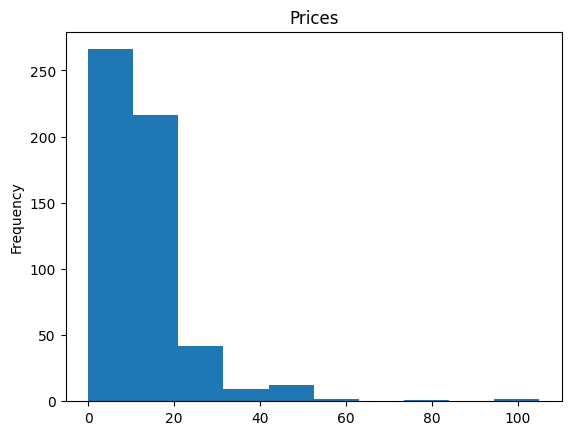

In [8]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

prices = pd.Series(books['price'])
prices.plot(kind='hist')
plt.title('Prices')
plt.show

In [9]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(f'max: {prices.max()}, min: {prices.min()}, mean: {prices.mean()}, median: {prices.median()}') 

max: 105, min: 0, mean: 13.1, median: 11.0


In [10]:
max_rating = books['user_rating'].max()
print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_rating}")

Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [11]:
max_rating_books = books[books['user_rating'] == max_rating]
print(f"Скільки книг мають такий рейтинг? Відповідь: {max_rating_books.shape[0]}")

Скільки книг мають такий рейтинг? Відповідь: 52


In [12]:
rev_book = books[books['reviews'] == books['reviews'].max()]

print(f"Яка книга має найбільше відгуків? Відповідь: {rev_book['name']}")

Яка книга має найбільше відгуків? Відповідь: 534    Where the Crawdads Sing
Name: name, dtype: object


In [13]:
books_2015 = books[books['year'] == 2015]
max_price = books_2015['price'].max()
expencive_book = books_2015[books_2015['price'] == max_price]
print(f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: {expencive_book['name']}")

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: 277    Publication Manual of the American Psychologic...
Name: name, dtype: object


In [14]:
books_2010 = books.loc[(books['year'] == 2010) & (books['genre'] == 'Fiction')]

print(f'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: {books_2010.shape[0]}')

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [15]:
books_10_11 = books[books['year'].isin([2010, 2011])]
result = books_10_11[books_10_11['user_rating'] == 4.9]
print(f'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {result.shape[0]}')

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1


In [16]:
#давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
books_2015 = books.query('year == 2015 & price < 8').sort_values('price')
print(f'Яка книга остання у відсортованому списку? Відповідь:')
print(books_2015.tail(1))

Яка книга остання у відсортованому списку? Відповідь:
                                      name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [17]:
result = books.groupby('genre').agg({'price' : ['max', 'min']})
result

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

In [18]:
authors = books.groupby('author')['name'].agg('count')
authors

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64

In [19]:
print(f'Якої розмірності вийшла таблиця? Відповідь: {authors.shape}')

Якої розмірності вийшла таблиця? Відповідь: (248,)


In [20]:
author = authors[authors == authors.max()]

print(f'Який автор має найбільше книг? Відповідь: {author} ')

Який автор має найбільше книг? Відповідь: author
Jeff Kinney    12
Name: name, dtype: int64 


In [21]:
print(f'Скільки книг цього автора? Відповідь: {author.iloc[0]}')

Скільки книг цього автора? Відповідь: 12


In [22]:
rating = books.groupby('author')['user_rating'].agg('mean')
rating

author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: user_rating, Length: 248, dtype: float64

In [23]:
result = rating[rating == rating.min()]

print(f'У якого автора середній рейтинг мінімальний? Відповідь: {result}')

У якого автора середній рейтинг мінімальний? Відповідь: author
Donna Tartt    3.9
Name: user_rating, dtype: float64


In [24]:
print(f'Який у цього автора середній рейтинг? Відповідь: {result.iloc[0]}')

Який у цього автора середній рейтинг? Відповідь: 3.9


In [25]:
df = pd.concat([authors, rating], axis=1)
df

,name,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [26]:
df = df.sort_values(by=['name', 'user_rating'])
df               

,name,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [27]:
print(f'Який автор перший у списку? Відповідь:')
df.head(1)

Який автор перший у списку? Відповідь:


,name,user_rating
author,,
Muriel Barbery,1,4.0


<b>Візуалізація</b>

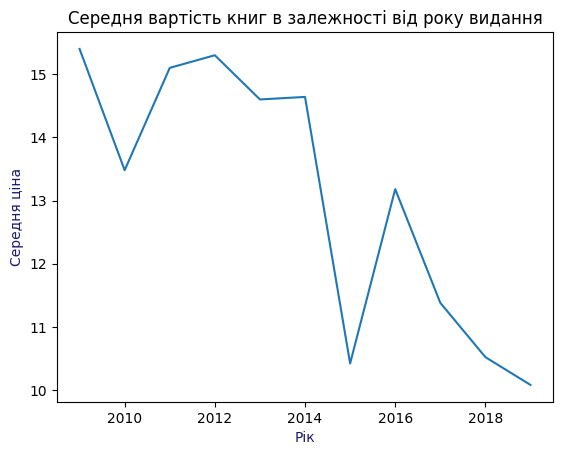

In [28]:
prices = books.groupby('year')['price'].agg('mean')
plt.plot(prices)
plt.ylabel('Середня ціна', fontsize='medium', color='midnightblue')
plt.xlabel('Рік', fontsize='medium', color='midnightblue')
plt.title('Середня вартість книг в залежності від року видання', fontsize='large')
plt.show()

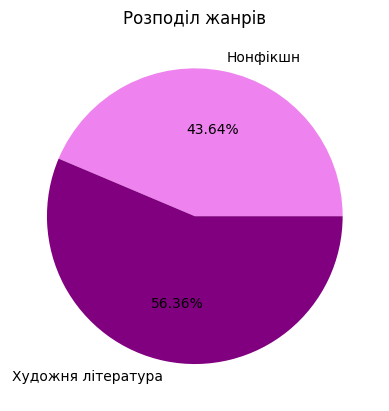

In [29]:
genres = books.groupby('genre')['genre'].agg('count')
plt.pie(genres,
       labels=['Нонфікшн', 'Художня література'],
       autopct='%.2f%%',
       colors=['violet', 'purple'])
plt.title('Розподіл жанрів', size='large')
plt.show()

C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

<Axes: xlabel='price', ylabel='user_rating'>

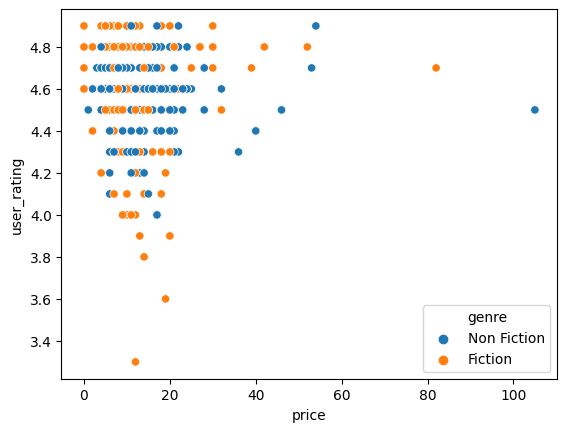

In [30]:
#ТОчковий графік залежності ціни книги від її рейтингу
sns.scatterplot(x='price', y='user_rating', hue='genre', data=books)

C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='user_rating', ylabel='count'>

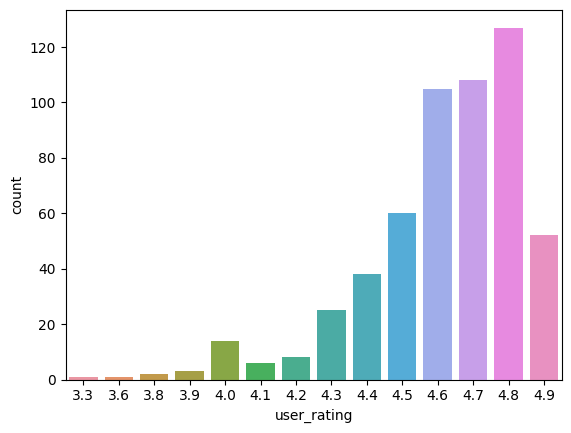

In [31]:
sns.countplot(x='user_rating', data=books)

C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZipovUA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='genre', ylabel='user_rating'>

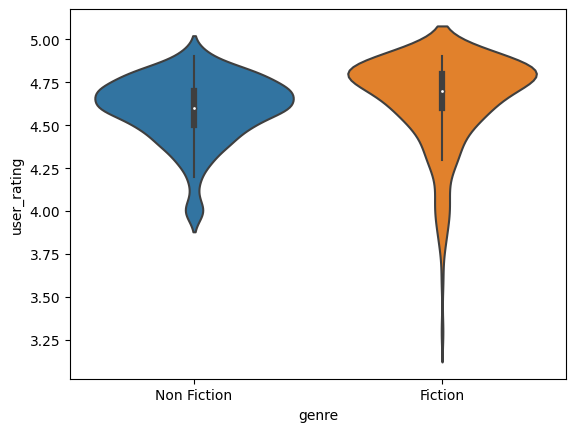

In [32]:
sns.violinplot(x='genre', y='user_rating', data=books)